# Pre-trained YOLOv3

In [1]:
import yolo3_one_file_to_detect_them_all as yolo3

Using TensorFlow backend.


In [2]:
# yolo3 parameters
net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.54
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]


In [3]:
# Define the Model
model = yolo3.make_yolov3_model()

2021-10-18 09:18:44.192151: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-18 09:18:44.192186: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-18 09:18:44.192209: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (samantha-ThinkPad-X240): /proc/driver/nvidia/version does not exist
2021-10-18 09:18:44.192406: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-18 09:18:44.215893: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2693685000 Hz
2021-10-18 09:18:44.216267: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7cdc000b60 initialized for platform Host (this does not gu

In [4]:
# load the model weights from file yolov3.weights
weight_reader = yolo3.WeightReader('yolov3.weights')

In [5]:
# set the model weights into the model
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [6]:
# save the model
model.save('yolov3.h5')

# Load an image

In [7]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
file_name = 'data/zebra.jpg'

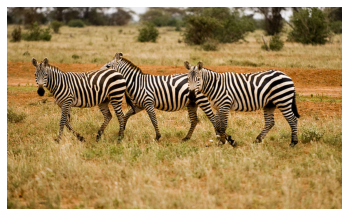

741120


In [40]:
# load an image
image = cv2.imread(file_name)

# show image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print(image.size)

In [41]:
# keep image width and height
image_h, image_w, _ = image.shape

In [42]:
# YOLOv3 model expects input shape = (416, 416, 3)
image = cv2.resize(image, (net_h, net_w))

print(image.shape)
print(image.min())
print(image.max())
print(image.dtype)

(416, 416, 3)
0
255
uint8


In [43]:
# preprocess input
# option 1 : reshape and normalize image manually
# option 2 : preprocess_input of yolo3
image = yolo3.preprocess_input(image, net_h, net_w)

In [44]:
print(image.shape)
print(image.min())
print(image.max())
print(image.dtype)

(1, 416, 416, 3)
0.0
1.0
float64


Note : now we have  
YOLOv3 model : model  
preprocessed input : image  
original image width : image_w  
original image height : image_h  

We're ready to make a prediction.

# Make a Prediction 

In [45]:
yhat = model.predict(image)

In [46]:
# explore the yhat
print(type(yhat))
print(len(yhat))
print(type(yhat[0]))
print([a.shape for a in yhat])

<class 'list'>
3
<class 'numpy.ndarray'>
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


These arrays predict both the bounding boxes and class labels.  
They need to be decoded.

# Interprete the Results : detection

In [47]:
# decode the bounding boxes from the yhat
class_threshold = 0.6
nms_threshold = 0.5
boxes = list()
for i in range(len(yhat)):
    boxes += yolo3.decode_netout(yhat[i][0], anchors[i], class_threshold, nms_threshold, net_h, net_w)

In [48]:
# explore the boxex result
print(len(boxes))
print(type(boxes[0]))
print(dir(boxes[0]))
print(boxes[0].classes)
print(boxes[0].label)
print(boxes[0].score)

10647
<class 'yolo3_one_file_to_detect_them_all.BoundBox'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'classes', 'get_label', 'get_score', 'label', 'objness', 'score', 'xmax', 'xmin', 'ymax', 'ymin']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
-1
-1


In [49]:
# correct the sizes of the bounding boxes
yolo3.correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)

In [50]:
# suppress non-maximal boxes 
# to merge the overlap boxes to the same object
yolo3.do_nms(boxes, nms_threshold)  

In [51]:
# explore boxes (again)
print(len(boxes))

10647


In [52]:
# get details of the valid objects
v_boxes, v_labels, v_scores = list(), list(), list()

for box in boxes :
    for i in range(len(labels)):
        if box.classes[i] > class_threshold:
            v_boxes.append(box)
            v_labels.append(labels[i])
            v_scores.append(box.classes[i]*100)

In [53]:
# summarize what we found
for i in range(len(v_boxes)):
    print('%s:%.3f' %(v_labels[i], v_scores[i]))

zebra:94.231
zebra:99.845
zebra:97.240


# Show detection result on image

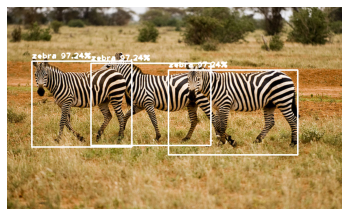

True

In [54]:
# load image as numpy array
image = plt.imread(file_name)

# plot each box
for box in v_boxes :
    # get coordinates
    y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
    # calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    
    # create rectangle
    cv2.rectangle(image, (x1,y1), (x2,y2), (255,255,255), 2)
    
    # add text and score
    cv2.putText(image, 
                f"{v_labels[i]} {round(v_scores[i],3)}%", 
                (x1,y1-5), 
                cv2.FONT_HERSHEY_PLAIN, 1, 
                (255,255,255), 2)

plt.imshow(image)
plt.axis('off')
plt.show()

# save the result
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite(file_name.split('.')[0]+'_detection.jpg', (image).astype('uint8')) 

In [25]:
# option 2 : draw bounding boxes on the image using yolo3.draw_boxes function
# image = plt.imread(file_name)
# yolo3.draw_boxes(image, boxes, labels, obj_thresh) 
# plt.imshow(image)
# plt.axis('off')
# plt.show()

# save the result
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.imwrite(file_name.split('.')[0]+'_detection.jpg', (image).astype('uint8')) 